In [20]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')  # hides warnings

# Dataset context

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

# EDA

In [21]:
customers = pd.read_csv(r"C:\Users\felip\Desktop\E-commerce SQL and Python Analytics Project\data\olist_customers_dataset.csv")

customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [22]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [23]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [24]:
# City with the most customers
customers["customer_city"].value_counts(ascending=False).head(5)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: count, dtype: int64

In [25]:
# State with most customers
customers["customer_state"].value_counts(ascending=False).head(5)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: count, dtype: int64

In [26]:
# Ciudad con más clientes

# Filtro
mask = customers["customer_state"] == "SP"

# Clientes por ciudad (conteo de filas)
clientes_por_ciudad = (
    customers.loc[mask]
    .groupby("customer_city")
    .size()
    .reset_index(name="n_clientes")
    .sort_values("n_clientes", ascending=False)
)

clientes_por_ciudad.head()

,customer_city,n_clientes
551,sao paulo,15540
104,campinas,1444
211,guarulhos,1189
535,sao bernardo do campo,938
526,santo andre,796


Since the most customers live in the city of Sao Paulo, it is better to focus all KPIs in the city of Sao Paulo rather than in the state of Sao Paulo.

In [27]:
geolocation = pd.read_csv(r"C:\Users\felip\Desktop\E-commerce SQL and Python Analytics Project\data\olist_geolocation_dataset.csv")

geolocation.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [28]:
geolocation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [29]:
# geolocation.dtypes

In [30]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [31]:
order_items = pd.read_csv(r"C:\Users\felip\Desktop\E-commerce SQL and Python Analytics Project\data\olist_order_items_dataset.csv")

order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [32]:
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [33]:
# order_items.dtypes

In [34]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [35]:
# order_items.isna().sum().sort_values(ascending=False)

In [36]:
order_payments = pd.read_csv(r"C:\Users\felip\Desktop\E-commerce SQL and Python Analytics Project\data\olist_order_payments_dataset.csv")

order_payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [37]:
order_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [38]:
order_payments["payment_type"].value_counts().sort_values(ascending=False)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [39]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [40]:
order_reviews = pd.read_csv(r"C:\Users\felip\Desktop\E-commerce SQL and Python Analytics Project\data\olist_order_reviews_dataset.csv")

order_reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [41]:
order_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [42]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [43]:
print((order_reviews["review_score"] >= 4).sum())

76470


In [44]:
order_reviews.isna().sum().sort_values(ascending=False)

review_comment_title       87656
review_comment_message     58247
review_id                      0
review_score                   0
order_id                       0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [45]:
order_reviews[order_reviews.isna() == True].head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
orders = pd.read_csv(r"C:\Users\felip\Desktop\E-commerce SQL and Python Analytics Project\data\olist_orders_dataset.csv")

orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [47]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [48]:
# Different types of Order status

orders["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [49]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [50]:
dt_columns_names = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for date_column in dt_columns_names:
    orders[date_column] = pd.to_datetime(orders[date_column], errors="coerce", utc=False)

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
purchased_date = orders["order_purchase_timestamp"]     # This just creates a Series

purchased_date = pd.DataFrame(purchased_date)   # This creates a DataFrame

purchased_date["purchased_year"] = purchased_date["order_purchase_timestamp"].dt.year
purchased_date["purchased_month"] = purchased_date["order_purchase_timestamp"].dt.month

purchased_date.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_purchase_timestamp  99441 non-null  datetime64[ns]
 1   purchased_year            99441 non-null  int32         
 2   purchased_month           99441 non-null  int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 1.5 MB


In [52]:
purchased_date["purchased_year"].value_counts()

purchased_year
2018    54011
2017    45101
2016      329
Name: count, dtype: int64

In [105]:
# keep only needed cols early + filter city on customers
cust_sp = customers.loc[
    customers["customer_city"].str.lower().eq("sao paulo"),
    ["customer_id"]
]

orders_sp = (
    orders.loc[
        orders["order_status"].eq("delivered"),
        ["order_id", "customer_id", "order_delivered_customer_date"]
    ]
    .merge(cust_sp, on="customer_id", how="inner")
    .reset_index(drop=True)
)

orders_sp.head()


,order_id,customer_id,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13
1,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,2017-07-19 14:04:48
2,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,2018-07-30 15:52:25
3,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,2018-03-12 23:36:26
4,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,2017-10-09 22:23:46


In [108]:

delivered_date = (
    orders_sp[["order_delivered_customer_date"]]
    .dropna(subset=["order_delivered_customer_date"])
    .reset_index(drop=True)
)

delivered_date["delivered_year"] = delivered_date["order_delivered_customer_date"].dt.year
delivered_date["delivered_quarter"] = delivered_date["order_delivered_customer_date"].dt.quarter

delivered_date.head()

,order_delivered_customer_date,delivered_year,delivered_quarter
0,2017-10-10 21:25:13,2017,4
1,2017-07-19 14:04:48,2017,3
2,2018-07-30 15:52:25,2018,3
3,2018-03-12 23:36:26,2018,1
4,2017-10-09 22:23:46,2017,4


In [109]:
delivered_q = (
    delivered_date.groupby(["delivered_year", "delivered_quarter"])
    .size()
    .reset_index(name="count")
    .sort_values("delivered_year")
)

delivered_q.value_counts()

delivered_year  delivered_quarter  count
2016            4                  31       1
2017            1                  579      1
                2                  1215     1
                3                  1669     1
                4                  2496     1
2018            1                  3039     1
                2                  3508     1
                3                  2508     1
Name: count, dtype: int64

In [54]:
orders.isna().sum().sort_values(ascending=False)

order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
order_purchase_timestamp            0
order_status                        0
customer_id                         0
order_estimated_delivery_date       0
dtype: int64

In [55]:
orders[orders.isna() == True].head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT
1,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT
2,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT


In [56]:
products = pd.read_csv(r"C:\Users\felip\Desktop\E-commerce SQL and Python Analytics Project\data\olist_products_dataset.csv")

products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [57]:
products.head(3)

# NOTA: Columnas con nombre "length" están mal escritas.

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [58]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [59]:
products.isna().sum().sort_values(ascending=False)

product_category_name         610
product_description_lenght    610
product_name_lenght           610
product_photos_qty            610
product_weight_g                2
product_height_cm               2
product_length_cm               2
product_width_cm                2
product_id                      0
dtype: int64

In [60]:
products[products.isna() == True].head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
sellers = pd.read_csv(r"C:\Users\felip\Desktop\E-commerce SQL and Python Analytics Project\data\olist_sellers_dataset.csv")

sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [62]:
sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [63]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [64]:
# City with the most sellers
sellers["seller_city"].value_counts(ascending=False).head(5)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
Name: count, dtype: int64

In [65]:
product_cat = pd.read_csv(r"C:\Users\felip\Desktop\E-commerce SQL and Python Analytics Project\data\product_category_name_translation.csv")

product_cat.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [66]:
product_cat.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [67]:
product_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## Objetivo de negocio

Nota: 
    * YoY = Year over Year (año contra año)
    * PP = Puntos porcentuales
        Ej. 74% − 70% = +4 pp. 

### 1 frase + grano (día/semana/mes)

**Aumentar el porcentaje de ordenes con estado "delivered" (órdenes delivered/órdenes creadas) en la ciudad de Sao Paulo en 2% por trimestre, en comparación al mismo trimestre del año pasado.**

**Grano: Se medirá por Quarter (Trimestre)**

* Fecha que define el trimestre: order_delivered_customer_date

Sugerido (Bonus):
    "Queremos aumentar la frecuencia de compra en clientes nuevos para mejorar el revenue recurrente.”"

## KPIs:

1) Aumentar ingresos (price sin freight) totales generados por pedidos en estado "delivered", en un 2%, en la ciudad de Sao Paulo, en comparación al mismo trimestre del año anterior.

    Formula relativa:
        YoY = Revenue_Q_t - Revenue_Q_{t-4} / Revenue_Q_{t-4}

    Meta:
        >= +2% YoY

    Exclusiones: Órdenes canceladas, fechas inválidas.

2) Aumentar la proporción (Share) de reviews de 4 o más estrellas en 2%. Reviews deben ser de la ciudad de Sao Paulo, fechadas en el trimestre y serán comparadas con el mismo trimestre del año anterior.

    Formula relativa:
        Share_Q_t − Share_Q_{t−4}

    Meta:
        +2 pp YoY

3) Reducir el percentil (P90) del lead time (días entre que se aprueba el pago y que cliente recibe orden) de pedidos en estado "delivered", por trimestre en la ciudad de Sao Paulo, en base al mismo trimestre del año anterior en 2%

    Formula relativa:
        LeadTime_Q_t − LeadTime_Q_{t−4}
        
    Meta: 
        <= −0.2 días

    Exclusiones: 
        Órdenes distintas a Delivered, fechas inválidas.

4) Aumentar “on-time rate” (% de pedidos con delivered_date ≤ estimated_date) de pedidos en estado "delivered", en la ciudad de Sao Paulo, por trimestre, en comparación al mismo trimestre del año anterior en 2%.

    Formula relativa:
        OnTimeRate_Q_t − OnTimeRate_Q_{t−4}

    Meta: 
        +2 pp YoY

    Exclusiones: 
        Pedidos sin estimated_date o sin delivered_date.

    Bonus: “lateness promedio en días” solo para los atrasados.

5) Mejorar el porcentaje de participación (Share) de la categoría de productos más vendida en Q_{t−4}, por trimestre, en la ciudad de Sao Paulo, en base al mismo trimestre del año anterior en 2%


    Formula relativa:
        ShareTopCat(Q_t) − ShareTopCat(Qt−4​)

    Meta:
        +2 pp YoY

Bonus:
    - Aumentar la frecuencia de compra de clientes (Disminuir tiempo entre orden y orden) (Para mejorar el revenue recurrente)

## Preguntas de negocios

- ¿Qué categoría de producto es la más vendida?
- ¿Qué producto es el más vendido?
- ¿Top 10 (ó 5) clientes que más compran?
    - ¿Qué compran?
- ¿Top 10 sellers?
    - ¿Qué venden los top 10 sellers?
- ¿Cuál es el performance de los shippings?

# Modelo de Datos

## Grano de tabla de hechos (fact_event)

El grano de core.fact_events es order_id (Línea de pedido: un pedido puede tener más de un item).

## Fecha de referencia para el trimestre

Se asigna el trimestre por "order_delivered_customer_date".

## Tables and schemas

Star Schema

### core.facts_event (Tabla de hechos)

    - event_id (PK)
    - order_id (order identifier)
    - order_item_id (número de ítem dentro del pedido)
    - price (table: order_items)
    - freight_value (table: order_items)
    - lead_time_days (Delivered date - Approved date in days)
    - on_time_flag (1 if delivered_date <= estimated_date, if not, then 0)
    - calendar_sk (FK)
    - customer_sk (FK)
    - product_sk (FK)
    - seller_sk (FK) (Optional)
    - external_sk (FK) (Optional)

### core.dim_calendar

    **Note**: We are going to use order_delivered_customer_date to define the Quarter's date.

    Use: Group by quarter

    - calendar_sk (PK)
    - date
    - day_of_week
    - week
    - month
    - quarter
    - year
    - is_holiday (optional)

### core.dim_customer

    Use: Filter using Sao Paulo, the city.

    - customer_sk   (PK)
    - customer_id   (FK)
    - customer_city
    - customer_state (Optional)

### core.dim_product

    Use: Star category KPI and mix analysis (?) 

    - product_sk    (PK)
    - product_id    (FK)
    - product_category_name

### core.dim_seller (optional)

    Use: Seller performance/Seller's city performance

    - seller_sk (PK)
    - seller_id (FK)
    - seller_city
    - seller_state (Optional)

### core.dim_external (optional)

    - external_sk   (PK)
    - date
    - city
    - temp
    - rain
    - is_holiday

Nota: 
    
    Cuando agregas datos “externos” (p. ej., clima o feriados) normalmente no vienen con order_id. Para poder enlazarlos a tus ventas, necesitas una llave de unión que ambos compartan. Lo más natural es (fecha, ciudad)
    
    Llave de unión conceptual: (date + city); en la fact la reemplazas por external_sk

## Relations

core.fact_events (N) → core.dim_calendar (1) por calendar_id

core.fact_events (N) → core.dim_customer (1) por customer_sk

core.fact_events (N) → core.dim_product (1) por product_sk

(opt.) core.fact_events (N) → core.dim_seller (1)

(opt.) core.fact_events (N) → core.dim_external (1)

## Quality checks

    - Only delivered order's status.
    - For Revenue we'll only consider the "price" column. we'll not include "freight".
    - Filter by "sao paulo" city.
    - Quarters define by "order_delivered_customer_date".
    - Exclude orders with null dates on "order_delivered_customer_date" or "order_estimated_delivery_date".
    - Metric ranges: price >= 0, freight_value >= 0, lead_time_days >= 0.
    



# Connection to DB

In [ ]:
# Imports
from dotenv import load_dotenv
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import os

In [69]:
# SQLAlchemy engine

# -------- 1) Load environment variables (.env) --------

# This allows to change credentials without changing code.
load_dotenv()

DB_USER = os.getenv("DB_USER", "postgres")
DB_PASS = os.getenv("DB_PASS", "")
DB_NAME = os.getenv("DB_NAME", "ecom")
DB_HOST = os.getenv("DB_HOST", "localhost")
DB_PORT = int(os.getenv("DB_PORT", "5432"))

# -------- 2) Build the SQLAlchemy engine URL --------

# Connecting to "ecom" DB
url = URL.create(
    "postgresql+psycopg2",
    username=DB_USER,
    password=DB_PASS,
    host=DB_HOST,
    port=DB_PORT,
    database=DB_NAME
)

# Creating engine
engine = create_engine(url, echo=False, pool_pre_ping=True, future=True)


## Fetching KPIs into Dataframes

In [117]:
import matplotlib.pyplot as plt

### vw_revenue_quarter_sp

In [70]:
with engine.connect() as conn:
    rev_q_df = pd.read_sql("SELECT * FROM analytics.vw_revenue_quarter_sp", conn)

rev_q_df.head()


,year,quarter,revenue_sp
0,2017,1,80354.63
1,2016,4,3489.90
2,2017,4,291397.65
3,2017,3,198552.00
4,2018,1,358767.94


In [71]:
rev_q_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        8 non-null      int64  
 1   quarter     8 non-null      int64  
 2   revenue_sp  8 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 320.0 bytes


In [ ]:
# Sorting values so they appear ordered in the x axis when ploting
rev_q_df = rev_q_df.sort_values(["year", "quarter"])

# Converting "year" and "quarter" into a single label 
# to make a readable plot 
rev_q_df["label"] = rev_q_df["year"].astype(str) + " Q" + rev_q_df["quarter"].astype(str)


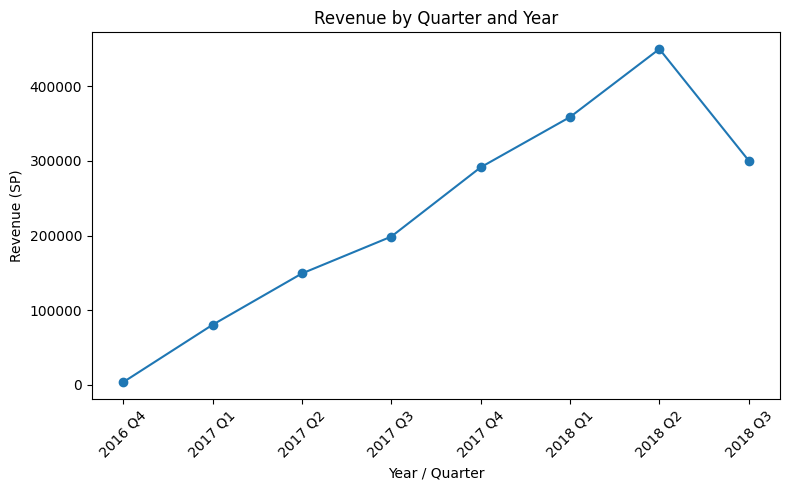

In [ ]:
# Plot revenue vs year/quarter
plt.figure(figsize=(8,5))
plt.plot(rev_q_df["label"], rev_q_df["revenue_sp"], marker="o")
plt.xlabel("Year / Quarter")
plt.ylabel("Revenue (SP)")
plt.title("Revenue by Quarter and Year")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### vw_reviews_share_quarter_sp

In [72]:
with engine.connect() as conn:
    review_share_q_df = pd.read_sql("SELECT * FROM analytics.vw_reviews_share_quarter_sp", conn)

review_share_q_df.head()

,year,quarter,share_ge4
0,2016,4,0.741935
1,2017,1,0.803448
2,2017,2,0.797197
3,2017,3,0.830650
4,2017,4,0.795763


In [73]:
review_share_q_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       8 non-null      int64  
 1   quarter    8 non-null      int64  
 2   share_ge4  8 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 320.0 bytes


In [124]:
# Sorting values so they appear ordered in the x axis when ploting
review_share_q_df = review_share_q_df.sort_values(["year", "quarter"])

# Converting "year" and "quarter" into a single label 
# to make a readable plot 
review_share_q_df["label"] = review_share_q_df["year"].astype(str) + " Q" + review_share_q_df["quarter"].astype(str)


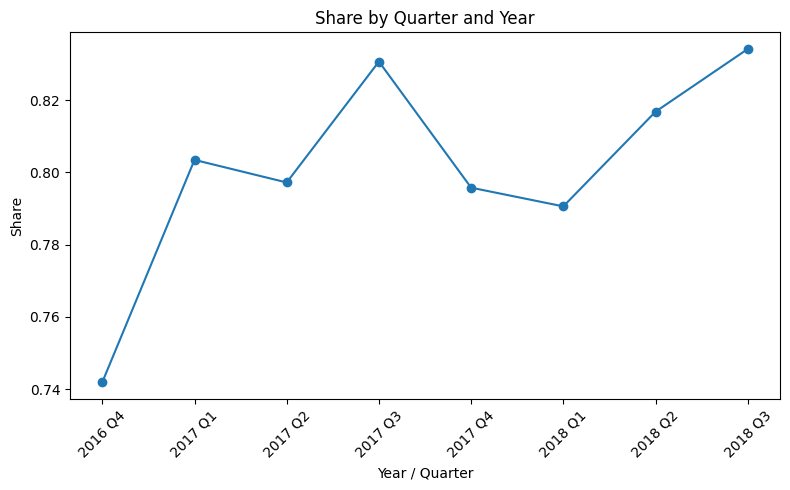

In [ ]:
# Plot share vs year/quarter
plt.figure(figsize=(8,5))
plt.plot(review_share_q_df["label"], review_share_q_df["share_ge4"], marker="o")
plt.xlabel("Year / Quarter")
plt.ylabel("Share")
plt.title("Share by Year and Quarter")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### vw_leadtime_p90_quarter_sp

In [110]:
with engine.connect() as conn:
    leadtime_p90_df = pd.read_sql("SELECT * FROM analytics.vw_leadtime_p90_quarter_sp", conn)

leadtime_p90_df.head()

,year,quarter,lead_time_p90
0,2016,4,38.851534
1,2017,1,13.090919
2,2017,2,15.514034
3,2017,3,13.031889
4,2017,4,15.742917


### vw_on_time_rate_quarter_sp

In [111]:
with engine.connect() as conn:
    ontimerate_df = pd.read_sql("SELECT * FROM analytics.vw_on_time_rate_quarter_sp", conn)

ontimerate_df.head()

,year,quarter,on_time_flag
0,2017,1,0.978125
1,2016,4,0.972222
2,2017,4,0.945880
3,2017,3,0.960168
4,2018,1,0.937427


### vw_category_share_quarter_sp

In [115]:
with engine.connect() as conn:
    cat_share_df = pd.read_sql("SELECT * FROM analytics.vw_category_share_quarter_sp", conn)

cat_share_df.head()

,year,quarter,category,revenue_cat,revenue_total,share_cat
0,2016,4,watches_gifts,29.90,3489.9,0.008568
1,2016,4,auto,59.89,3489.9,0.017161
2,2016,4,industry_commerce_and_business,179.80,3489.9,0.051520
3,2016,4,perfumery,152.70,3489.9,0.043755
4,2016,4,sports_leisure,21.50,3489.9,0.006161


In [116]:
cat_share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           413 non-null    int64  
 1   quarter        413 non-null    int64  
 2   category       413 non-null    object 
 3   revenue_cat    413 non-null    float64
 4   revenue_total  413 non-null    float64
 5   share_cat      413 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 19.5+ KB
